In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [2]:
import pandas as pd
import numpy as np
import time

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Embedding, Dropout
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt


In [ ]:
#Connect to google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#Read dataset
path = './Dataset.csv'
df = pd.read_csv(path)
print(df.shape)
print(df.head(3))

df = df[['review','sentiment']]
#create a new column in the dataframe
df['label'] = df['sentiment']
print(df.head(3))

print(df.groupby('sentiment').count())
#change values in the column label based on values
df.label.replace(to_replace ="positive", value = 1, inplace = True)
df.label.replace(to_replace ="negative", value = 0, inplace = True)
print(df.head(5))


(50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
                                              review sentiment     label
0  One of the other reviewers has mentioned that ...  positive  positive
1  A wonderful little production. <br /><br />The...  positive  positive
2  I thought this was a wonderful way to spend ti...  positive  positive
           review  label
sentiment               
negative    25000  25000
positive    25000  25000
                                              review sentiment  label
0  One of the other reviewers has mentioned that ...  positive      1
1  A wonderful little production. <br /><br />The...  positive      1
2  I thought this was a wonderful way to spend ti...  positive      1
3  Basically there's a family where a little boy ...  negative   

In [4]:
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [6]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.2/763.2 KB 33.7 MB/s eta 0:00:00


In [7]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation
import string
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
### Cleaning up the text
def clean_text(text):  
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split() #default separator is any whitespace.
    #print("text: ", text)
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]   # no stop words and no words less than 3 chars
    
    text = " ".join(text)    ## Clean the text
    #print("text1: ", text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text) #Here is a regex to match a string of characters that are not a letters or numbers
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)  
    
    ## Stemming
    text = text.split()
    #print("text2: ", text)
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text] 
    text = " ".join(stemmed_words)
    #print("text3: ", text)
    return text

In [9]:
# apply the above function to df['text']
df['review'] = df['review'].map(lambda x: clean_text(x)) # It executes the function_object for each element in the sequence and 
                                                         # returns a list of the elements modified by the function object.



In [10]:
df.head()

,review,sentiment,label
0,one review mention watch episod hook right exa...,positive,1
1,wonder littl product <br <br the film techniqu...,positive,1
2,thought wonder way spend time hot summer weeke...,positive,1
3,basic there famili littl boy jake think there ...,negative,0
4,petter mattei love time money visual stun film...,positive,1


For example, consider the sentence " The earth is an awesome place live"

tokenizer.fit_on_texts("The earth is an awesome place to live") fits [[1,2,3,4,5,6,7,8]] where 3 -> "is" , 6 -> "place", so on. 

sequences = tokenizer.texts_to_sequences("The earth is an great place to live") returns [[1,2,3,4,6,7,8]].

In [11]:
#TO DO:
tokenizer_test = Tokenizer()
tokenizer_test.fit_on_texts(["The earth is an awesome place to live", "The house is an amazing place to live"])

#TO DO: get some statistics
print(tokenizer_test.word_index)
vocab_size = len(tokenizer_test.word_index) + 1 # !!! adding 1 because of reserverd 0 index #So that the word indexes are 1-offset, and 0 is reserved for no data.
print("vocabulary size: ", vocab_size)

for word, index in tokenizer_test.word_index.items():
  print(word, index)

{'the': 1, 'is': 2, 'an': 3, 'place': 4, 'to': 5, 'live': 6, 'earth': 7, 'awesome': 8, 'house': 9, 'amazing': 10}
vocabulary size:  11
the 1
is 2
an 3
place 4
to 5
live 6
earth 7
awesome 8
house 9
amazing 10


In [12]:
#TO DO
sequence_test = tokenizer_test.texts_to_sequences(["The earth is an great place to live"]) #each word into an integer
print("tokenized sequence: ", sequence_test, len(sequence_test[0]), len(("The earth is an great place to live").split()))


tokenized sequence:  [[1, 7, 2, 3, 4, 5, 6]] 7 8


In [13]:

RANDOM_STATE = 42
#TO DO: add review to X and Y

X = df["review"].fillna('').to_list()  # no NaN or strange chars
X = [str(i) for i in X]
y = df["label"].fillna('').to_list()

# Split train & test
text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_STATE)
print(text_train[0])
print(text_train[1])

#TO DO : 
# Tokenize and transform to integer index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test  = tokenizer.texts_to_sequences(text_test)
print("X_train[0]",X_train[0])

#TO DO: get some statistics
vocab_size = len(tokenizer.word_index) + 1 # adding 1 because of reserverd 0 index
print("vocabulary size: ", vocab_size)

maxlen_train = max( len(x) for x in X_train)
maxlen_test = max( len(x) for x in X_test)

print("maxlen train dataset: ", maxlen_train)
print("maxlen test dataset: ", maxlen_test)


recent start watch show say realli made laugh appreci unrealist aspect it along everyth els peopl said show realist reaction dead among thing go accept ned bring dead back life accept complet crazi bit show help smile everi episod watch realli think great show take strang subject realli make great watch absolut love narrat think add extra bit wonder whole show ca not alway compar old show writer new one take everyth entiti definit give chanc enjoy ridicul part are
return jedi often rememb wrong rather right shame last chronolog instal star war saga shine exampl epic storytel manag wrap stori line previous movi one grand final convinc <br <br yes ewok cute cudd bear arguabl serv broaden star war demograph middl movi tend slow bit final hour arguabl best piec entir saga luke final come face face darth vader recogniz villain movi histori <br <br return jedi mani thing right peopl tend overlook : present incred conclus darth vader storylin which went slight implaus empir strike back convin

In [14]:
#TO DO: 
# 
maxlen = maxlen_train

X_train = pad_sequences(X_train, padding="post", maxlen=maxlen)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlen)

In [15]:
X_test[1]
#X_train.shape

array([ 48, 654,  22, ...,   0,   0,   0], dtype=int32)

In [16]:
#X_test[0]
X_test.shape

(5000, 1461)


Example:

doc_1="bitty bought a bit of butter"

doc_2="but the bit of butter was a bit bitter"

doc_3="so she bought some better butter to make the bitter butter better"


The encoding for document 1  is :  [45, 16, 32, 27, 34, 33]

The encoding for document 2  is :  [24, 2, 27, 34, 33, 37, 32, 27, 3]

The encoding for document 3  is :  [22, 27, 16, 28, 35, 33, 7, 2, 2, 3, 33, 35]



---



PADDING THE DOCS (to make very doc of same length)

The maximum number of words in any document is :  12

The padded encoding for document 1  is :  [45 16 32 27 34 33  0  0  0  0  0  0]

The padded encoding for document 2  is :  [24  2 27 34 33 37 32 27  3  0  0  0]

The padded encoding for document 3  is :  [22 27 16 28 35 33  7  2  2  3 33 35]


---
ACTUALLY CREATING THE EMBEDDINGS using KERAS EMBEDDING LAYER

word_input=Input(shape=(maxlen,),dtype='float64')  
Embedding(input_dim=vocab_size,output_dim=8,input_length=maxlen)


---


PARAMETERS OF THE EMBEDDING LAYER ---

'input_dim' = the vocab size that we will choose. In other words it is the number of unique words in the vocab.

'output_dim' = the number of dimensions we wish to embed into. Each word will be represented by a vector of this much dimensions.

'input_length' = lenght of the maximum document. which is stored in maxlen variable in our case.

---


The resulting shape is (3,12,8).


3---> no of documents

12---> each document is made of 12 words which was our maximum length of any document.

& 8---> each word is 8 dimensional.

embedding of the doc_1: where is word is encoded with a vector of size 8:

Shape of embeddings :  (3, 12, 8)

[[ 0.00501078 -0.02695217  0.00602702  0.00266289  0.03473682
    0.0097171   0.01049457  0.04075214]

  [-0.01465576 -0.03764923  0.02566164 -0.03778331  0.00713614
    0.04891029 -0.04066588  0.04367645]

  [ 0.02802004  0.03197568 -0.03032377 -0.04005457  0.04845554
    0.04599163  0.03079205  0.00011758]

  [ 0.0425863   0.01251983 -0.00086614  0.01517198  0.03247393
   -0.0487391   0.01155691 -0.02174735]

  [ 0.01364631 -0.03071666  0.04824429  0.01273396 -0.04050324
   -0.02806609  0.02730856 -0.00130756]

  [ 0.00662886  0.01568889 -0.02373004 -0.02203096  0.04081896
    0.04661508 -0.0180509  -0.01726084]

  [-0.04217806 -0.04307245 -0.02673855  0.03635491 -0.01157793
   -0.00228085 -0.00746915  0.03362348]

  [-0.04217806 -0.04307245 -0.02673855  0.03635491 -0.01157793
   -0.00228085 -0.00746915  0.03362348]

  [-0.04217806 -0.04307245 -0.02673855  0.03635491 -0.01157793
   -0.00228085 -0.00746915  0.03362348]

  [-0.04217806 -0.04307245 -0.02673855  0.03635491 -0.01157793
   -0.00228085 -0.00746915  0.03362348]

  [-0.04217806 -0.04307245 -0.02673855  0.03635491 -0.01157793
   -0.00228085 -0.00746915  0.03362348]

  [-0.04217806 -0.04307245 -0.02673855  0.03635491 -0.01157793
   -0.00228085 -0.00746915  0.03362348]]



In [17]:
#TO DO:
# Define MLP architecture
embedding_dim = 100

model_dense = Sequential()

model_dense.add(Embedding(vocab_size, embedding_dim, input_length=maxlen)) #output 3d (batch_size, input_length, output_dim)

model_dense.add(Flatten())

model_dense.add(Dense(128, activation = "relu"))
#add dropout if necessary xD
model_dense.add(Dense(64, activation = "relu"))

# model_dense.add(Dense(2, activation = "softmax"))

model_dense.add(Dense(1, activation = "sigmoid"))

#end of model architecture

model_dense.compile(optimizer = "adam", loss ="binary_crossentropy", metrics = ["accuracy"] )
model_dense.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1461, 100)         6995400   
_________________________________________________________________
flatten (Flatten)            (None, 146100)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               18700928  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 25,704,649
Trainable params: 25,704,649
Non-trainable params: 0
_________________________________________________________________


2022-05-12 10:10:54.792110: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-12 10:10:54.792133: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-12 10:10:54.792150: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (80d80221f392): /proc/driver/nvidia/version does not exist
2022-05-12 10:10:54.792335: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
#TO DO:
# Fit model and get the history
history = model_dense.fit(np.array(X_train), np.array(y_train), epochs=1,verbose=True, validation_data=(np.array(X_test), np.array(y_test)),batch_size=32)


2022-05-12 10:11:02.834971: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1407/1407 [==============================] - 80s 56ms/step - loss: 0.3353 - accuracy: 0.8456 - val_loss: 0.2676 - val_accuracy: 0.8902


In [19]:
#TO DO : evaluate the model 
loss, accuracy = model_dense.evaluate(np.array(X_test), np.array(y_test), verbose = 1 )


157/157 [==============================] - 1s 4ms/step - loss: 0.2676 - accuracy: 0.8902


In [20]:
history.history

{'loss': [0.335263729095459],
 'accuracy': [0.845644474029541],
 'val_loss': [0.26758474111557007],
 'val_accuracy': [0.8902000188827515]}

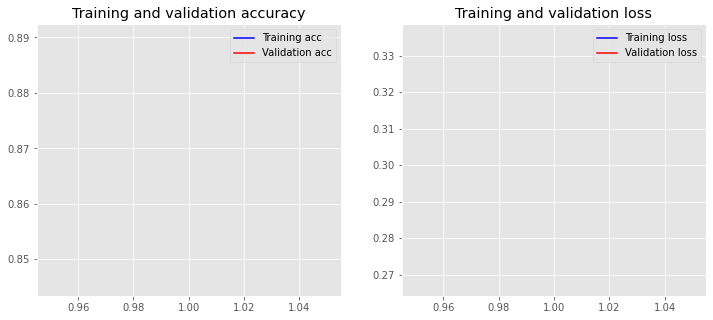

In [21]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_history(history)

In [24]:
#TO DO : predictions on new sample

# x_sample = ["this movie is great"]
x_sample = ["this movie is bad"]


x_sample = tokenizer.texts_to_sequences(x_sample)
print(np.array(x_sample).shape)

x_sample = pad_sequences(x_sample, padding = "post", maxlen = maxlen)
print(x_sample.shape)

#print(model_dense.predict(x_sample))
y_sample = model_dense.predict(x_sample)

print(y_sample)
#print("Prediction: ", np.argmax(y_sample))

if y_sample <= 0.5:
  print('Prediction: ', 0)
else:
  print('Prediction: ', 1)

(1, 4)
(1, 1461)
[[0.3673836]]
Prediction:  0


**Use pre-trained Glove word embeddings**

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581

In [25]:
#TO DO : get read the glove embedding from google drive and create dictionary : word->embedding
#/content/drive/My Drive/imdb/Dataset.csv
embeddings_index = dict()
f = open('./glove.6B.50d.txt')

for line in f: 
  values = line.split()
  word = values[0]
  coefs = np.array(values[1:], dtype = "float32")
  embeddings_index[word] = coefs

f.close()

In [26]:
embeddings_index

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

In [29]:
#embeddings_index["of"] #.shape -> 50 which is the embedding dimensions
print(embeddings_index.get("house"))
print(embeddings_index["of"])
print(len(embeddings_index))

[ 0.60137    0.28521   -0.032038  -0.43026    0.74806    0.26223
 -0.97361    0.078581  -0.57588   -1.188     -1.8507    -0.24887
  0.055549   0.0086155  0.067951   0.40554   -0.073998  -0.21318
  0.37167   -0.71791    1.2234     0.35546   -0.41537   -0.21931
 -0.39661   -1.7831    -0.41507    0.29533   -0.41254    0.020096
  2.7425    -0.9926    -0.71033   -0.46813    0.28265   -0.077639
  0.3041    -0.06644    0.3951    -0.70747   -0.38894    0.23158
 -0.49508    0.14612   -0.02314    0.56389   -0.86188   -1.0278
  0.039922   0.20018  ]
[ 0.70853    0.57088   -0.4716     0.18048    0.54449    0.72603
  0.18157   -0.52393    0.10381   -0.17566    0.078852  -0.36216
 -0.11829   -0.83336    0.11917   -0.16605    0.061555  -0.012719
 -0.56623    0.013616   0.22851   -0.14396   -0.067549  -0.38157
 -0.23698   -1.7037    -0.86692   -0.26704   -0.2589     0.1767
  3.8676    -0.1613    -0.13273   -0.68881    0.18444    0.0052464
 -0.33874   -0.078956   0.24185    0.36576   -0.34727    0.2848

In [31]:
#TO DO : create embedding_matrix using the embedding_index dictionary and the tokenizer dictionary

embeddings_matrix = np.zeros((vocab_size, 50))   # 50 = embedding dimension
hits = 0
misses = 0

for word, index in tokenizer.word_index.items():
  print(word, index)
  if index > vocab_size-1:
    break
  else:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[index] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


br 1
movi 2
film 3
one 4
like 5
time 6
i 7
it 8
good 9
make 10
would 11
the 12
charact 13
see 14
watch 15
get 16
even 17
stori 18
realli 19
well 20
scene 21
show 22
look 23
bad 24
much 25
end 26
great 27
peopl 28
love 29
also 30
first 31
think 32
act 33
play 34
way 35
thing 36
made 37
could 38
know 39
say 40
seem 41
that 42
not 43
plot 44
work 45
two 46
actor 47
mani 48
seen 49
come 50
year 51
want 52
take 53
never 54
life 55
best 56
tri 57
this 58
littl 59
ever 60
man 61
there 62
give 63
better 64
still 65
find 66
and 67
perform 68
part 69
feel 70
someth 71
use 72
back 73
director 74
actual 75
lot 76
interest 77
am 78
have 79
go 80
real 81
guy 82
old 83
cast 84
though 85
funni 86
live 87
music 88
anoth 89
enjoy 90
all 91
star 92
noth 93
role 94
start 95
new 96
is 97
point 98
set 99
everi 100
girl 101
direct 102
believ 103
world 104
day 105
he 106
origin 107
turn 108
thought 109
quit 110
horror 111
kill 112
fact 113
minut 114
comedi 115
effect 116
action 117
pretti 118
happen 119
aroun

In [32]:
print(tokenizer.word_index.items())
print(len(tokenizer.word_index.items()))
print(vocab_size)

dict_items([('br', 1), ('movi', 2), ('film', 3), ('one', 4), ('like', 5), ('time', 6), ('i', 7), ('it', 8), ('good', 9), ('make', 10), ('would', 11), ('the', 12), ('charact', 13), ('see', 14), ('watch', 15), ('get', 16), ('even', 17), ('stori', 18), ('realli', 19), ('well', 20), ('scene', 21), ('show', 22), ('look', 23), ('bad', 24), ('much', 25), ('end', 26), ('great', 27), ('peopl', 28), ('love', 29), ('also', 30), ('first', 31), ('think', 32), ('act', 33), ('play', 34), ('way', 35), ('thing', 36), ('made', 37), ('could', 38), ('know', 39), ('say', 40), ('seem', 41), ('that', 42), ('not', 43), ('plot', 44), ('work', 45), ('two', 46), ('actor', 47), ('mani', 48), ('seen', 49), ('come', 50), ('year', 51), ('want', 52), ('take', 53), ('never', 54), ('life', 55), ('best', 56), ('tri', 57), ('this', 58), ('littl', 59), ('ever', 60), ('man', 61), ('there', 62), ('give', 63), ('better', 64), ('still', 65), ('find', 66), ('and', 67), ('perform', 68), ('part', 69), ('feel', 70), ('someth', 71

In [33]:
tokenizer.document_count

45000

In [34]:
print(list(tokenizer.word_index.keys())[list(tokenizer.word_index.values()).index(3)]) 
print(list(tokenizer.word_index.keys())[list(tokenizer.word_index.values()).index(2)]) 

film
movi


In [ ]:
#tokenizer.word_index

In [35]:
print(embeddings_matrix[3])
print(embeddings_matrix[2])

[ 0.06912     0.22159    -0.66613001 -0.14060999  0.063365    0.41747001
 -0.21723001 -1.04009998  0.026069    1.33819997 -0.083642    0.66324002
 -0.45989001  0.95883     1.31850004 -0.62523001  0.56152999  0.65288001
 -1.23640001  0.29692     1.23800004  0.80620998  0.40967     0.39945
  0.57982999 -1.36580002 -1.67639995  0.069718   -0.59634    -0.63116997
  2.58940005 -0.56914997  0.46878999 -0.9249     -0.44628999  0.42282999
  0.17636999 -0.014459   -0.75357997 -0.97850001  0.023075    1.2227
 -0.17517    -1.57430005 -0.95349997 -0.10959     0.24517    -0.93550998
 -0.20942999  0.67333001]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [44]:
# TO DO : 
## create model using the embedding_matrix from glove pretrained word-to-vector model
model_glove = Sequential()

model_glove.add (Embedding(vocab_size, 50, input_length=maxlen, weights=[embeddings_matrix], trainable=False))

model_glove.add(Flatten())   # 3d to 1d


#add dropout if necessary xD
model_glove.add(Dense(128, activation = "relu"))
model_glove.add(Dense(64, activation = "relu"))

model_glove.add(tf.keras.layers.Dropout(.2))
# model_dense.add(tf.keras.layers.Dense(2, activation = "softmax"))

model_glove.add(Dense(1, activation = "sigmoid"))

#end of model architecture

model_glove.compile(optimizer = "adam", loss ="binary_crossentropy", metrics = ["accuracy"] )
model_glove.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1461, 50)          3497700   
_________________________________________________________________
flatten_5 (Flatten)          (None, 73050)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               9350528   
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 12,856,549
Trainable params: 9,358,849
Non-trainable params: 3,497,700
___________________________________

In [45]:
#TO DO : fit the model
model_glove.fit(np.array(X_train), np.array(y_train), epochs=10,verbose=True, validation_data=(np.array(X_test), np.array(y_test)),batch_size=32)


Epoch 1/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.6099 - accuracy: 0.6718 - val_loss: 0.5854 - val_accuracy: 0.6904
Epoch 2/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.5191 - accuracy: 0.7402 - val_loss: 0.5832 - val_accuracy: 0.6988
Epoch 3/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.4388 - accuracy: 0.7880 - val_loss: 0.6561 - val_accuracy: 0.6892
Epoch 4/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.3255 - accuracy: 0.8504 - val_loss: 0.7805 - val_accuracy: 0.6724
Epoch 5/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.2090 - accuracy: 0.9103 - val_loss: 1.0890 - val_accuracy: 0.6722
Epoch 6/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1286 - accuracy: 0.9483 - val_loss: 1.4730 - val_accuracy: 0.6658
Epoch 7/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0892 - accuracy: 0.9683 - val_loss: 1.5347 -